In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import pickle
import seaborn as sns
from sklearn import decomposition
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
sns.set(color_codes=True)
%matplotlib inline
# Import necessary modules
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
data_frame = pd.read_csv("/content/drive/MyDrive/mansoor-work/dataset/merged_samples_mouse.csv")

In [ ]:
data_frame.shape

(27994, 523)

In [ ]:
data_frame.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F514,F515,F516,F517,F518,F519,F520,F521,F522,positive
0,57,184,756,3550,167,521,2093,589,1771,2315,...,0,7,2,0,9,8,0,0,0,1
1,42,134,564,2690,104,310,1282,320,876,1148,...,0,0,2,0,0,0,0,0,0,1
2,54,181,769,3673,159,536,2316,581,1976,2403,...,0,0,11,0,14,0,0,0,0,1
3,35,120,528,2592,90,300,1326,288,920,1038,...,0,0,2,0,0,0,0,0,0,1
4,45,171,761,3711,140,533,2361,532,2001,2228,...,0,0,2,0,0,0,0,0,0,1


In [ ]:
data_frame.tail(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F514,F515,F516,F517,F518,F519,F520,F521,F522,positive
18421,23,66,234,918,62,190,712,194,614,662,...,0,0,0,0,0,0,1,0,0,0
18422,32,91,317,1249,95,275,995,329,941,1235,...,0,0,0,0,0,5,3,6,0,0
18423,31,107,435,1907,83,278,1112,269,890,959,...,0,0,0,6,0,0,0,0,0,0
18424,35,103,347,1291,91,274,946,279,860,943,...,0,0,0,0,3,0,0,0,0,0
18425,39,126,490,2100,98,318,1236,298,964,1010,...,0,0,1,8,5,0,0,0,0,0


In [ ]:
print (data_frame.isnull().values.any())

False


In [ ]:
print(data_frame.columns)


Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       ...
       'F514', 'F515', 'F516', 'F517', 'F518', 'F519', 'F520', 'F521', 'F522',
       'positive'],
      dtype='object', length=523)


Check class distribution
Rare events are hard to predict

In [ ]:
num_obs = len(data_frame)

num_true = len(data_frame.loc[data_frame['positive'] == 1])
print(num_true)

num_false = len(data_frame.loc[data_frame['positive'] == 0])

print(num_false)

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

7404
7404
Number of True cases:  7404 (50.00%)
Number of False cases: 7404 (50.00%)


**Spliting the data**
70% for training, 30% for testing



In [ ]:
#from sklearn.cross_validation import train_test_split

predicted_class_names = ['positive']

# Separating out the target
y = data_frame.loc[:,['positive']].values

df2 = data_frame.drop(['positive'], axis=1)
df2.reset_index(inplace=True)
# Separating out the features
x = df2.values

# Standardizing the features
X = StandardScaler().fit_transform(x)


 **ANN, KNN, SVM, DT Stacking**

875/875 [==============================] - 1s 2ms/step
True Positive: 13997
False Positive: 0
True Negative: 13997
False Negative: 0
Accuracy: 1.0
Specificity: 1.0
Sensitivity: 1.0
MCC: 1.0
875/875 [==============================] - 2s 2ms/step
Results are saved in Stacking-ensemble-results_5_fold_for_mouse.csv


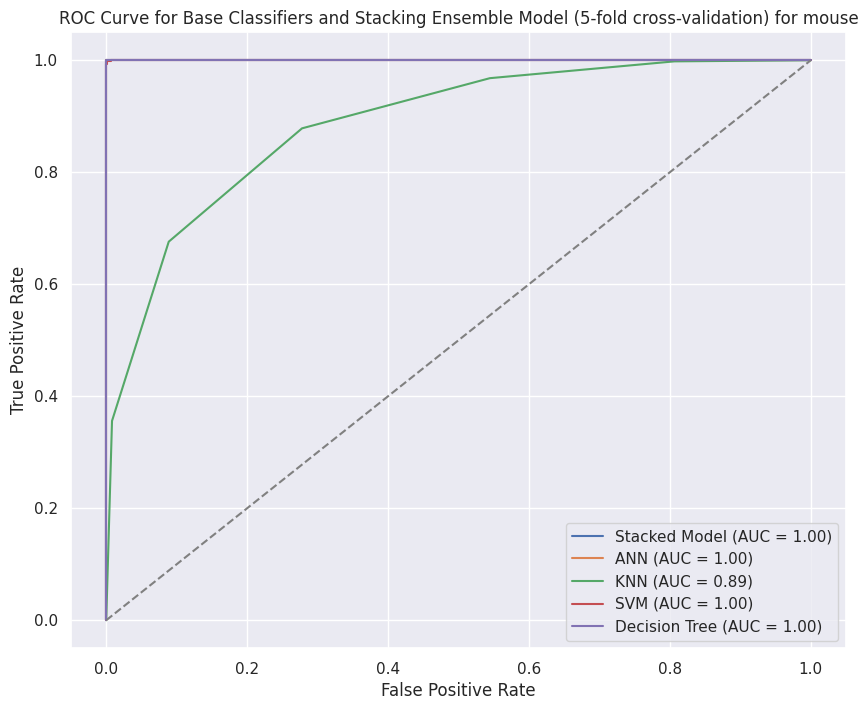

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
import csv

# Assuming X is your feature matrix and y is your target variable
# Ensure y is a 1D array
y = y.ravel()

# Define the number of folds for cross-validation
n_folds = 5

# Initialize lists to store metrics
metrics_list = []

# Initialize the figure for ROC curves
plt.figure(figsize=(10, 8))

# Define base classifiers
base_classifiers = {
    "ANN": tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(max_depth=5)
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize empty arrays to store predictions of base classifiers
base_predictions_train = np.empty((len(X), len(base_classifiers)))
base_predictions_test = np.zeros((len(X), len(base_classifiers)))  # Initialize with zeros

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for i, (clf_name, clf) in enumerate(base_classifiers.items()):
        # Special handling for ANN classifier
        if clf_name == "ANN":
            clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            clf.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
            y_proba_train = clf.predict(X_train).ravel()
            y_proba_test = clf.predict(X_test).ravel()
        else:
            # Fit the model on the training data
            clf.fit(X_train, y_train)

            # Predict probabilities for the train and test sets
            y_proba_train = clf.predict_proba(X_train)[:, 1]
            y_proba_test = clf.predict_proba(X_test)[:, 1]

        # Store predictions in arrays
        base_predictions_train[test_index, i] = y_proba_test

    # Predict for the entire dataset using the trained classifiers
    for i, (clf_name, clf) in enumerate(base_classifiers.items()):
        if clf_name == "ANN":
            base_predictions_test[:, i] += clf.predict(X).ravel()
        else:
            base_predictions_test[:, i] += clf.predict_proba(X)[:, 1]

# Normalize predictions by dividing by the number of folds
base_predictions_test /= n_folds

# Train meta-classifier (Gradient Boosting Classifier) on base classifier predictions
meta_classifier = GradientBoostingClassifier(n_estimators=100, max_depth=5)
meta_classifier.fit(base_predictions_train, y)

# Predict probabilities for the test set using stacked model
y_proba_stacked = meta_classifier.predict_proba(base_predictions_test)[:, 1]

# Calculate metrics for the stacked model
tn, fp, fn, tp = confusion_matrix(y, (y_proba_stacked > 0.5)).ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
mcc = matthews_corrcoef(y, (y_proba_stacked > 0.5))

# Print metrics to debug
print(f"True Positive: {tp}")
print(f"False Positive: {fp}")
print(f"True Negative: {tn}")
print(f"False Negative: {fn}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"MCC: {mcc}")

# Store metrics of stacked model in a dictionary
stacked_metrics = {
    "Classifier": "Stacked Model",
    "True Positive": tp,
    "False Positive": fp,
    "True Negative": tn,
    "False Negative": fn,
    "Accuracy": accuracy,
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "MCC": mcc
}

# Append stacked model metrics to list
metrics_list.append(stacked_metrics)

# Plot ROC curve for the stacked model
fpr, tpr, _ = roc_curve(y, y_proba_stacked)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Stacked Model (AUC = {roc_auc:.2f})')

# Update the metrics list with individual classifier results and plot ROC curves
for clf_name, clf in base_classifiers.items():
    if clf_name == "ANN":
        y_proba = clf.predict(X).ravel()
    else:
        y_proba = clf.predict_proba(X)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y, (y_proba > 0.5)).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    mcc = matthews_corrcoef(y, (y_proba > 0.5))

    classifier_metrics = {
        "Classifier": clf_name,
        "True Positive": tp,
        "False Positive": fp,
        "True Negative": tn,
        "False Negative": fn,
        "Accuracy": accuracy,
        "Specificity": specificity,
        "Sensitivity": sensitivity,
        "MCC": mcc
    }
    metrics_list.append(classifier_metrics)

    # Plot ROC curve for each classifier
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Add labels and legend for ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Base Classifiers and Stacking Ensemble Model (5-fold cross-validation) for mouse')
plt.legend()

# Save the ROC curve plot
plt.savefig('ROC_Curve_Base_Classifiers_and_Stacking_Ensemble_Model_5_fold_cross_validation for mouse.png')

# Save results to a CSV file
csv_file = 'Stacking-ensemble-results_5_fold_for_mouse.csv'
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['Classifier', 'True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy', 'Specificity', 'Sensitivity', 'MCC']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for metrics in metrics_list:
        writer.writerow(metrics)

print(f"Results are saved in {csv_file}")
